In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import r2_score as r2

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import seaborn as sns
from matplotlib.pyplot import plot as plt
from matplotlib.pyplot import figure

In [41]:
train=pd.read_csv('train.csv',index_col="id")
test=pd.read_csv('test.csv',index_col="id")

In [42]:
train

,span,target,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_50_type5,feature_51_type5,feature_52_type5,feature_53_type5,feature_54_type5,feature_55_type5,feature_56_type5,feature_57_type5,feature_58_type5,feature_59_type5
id,,,,,,,,,,,,,,,,,,,,,
M00yaXQwMVJ1R1Q0RHFBVVR5BHyNyIeEd7yqxidFW7U=,17,1.025179,1.455438,0.767232,1.103207,0.355392,0.144054,1.249518,0.301203,-1.470791,...,-1.395021,-1.222626,-0.139682,0.813436,-0.340162,-0.032112,1.740059,1.000138,-1.667038,-0.128554
M01HU2pzN1dZNnVOYmhjayLgjCmIG1AyHvfRsZv+IV4=,23,0.996383,0.132304,1.724691,1.517504,0.884100,-0.897716,-0.122241,1.523423,-1.152261,...,-1.269116,0.477700,1.590249,0.166410,0.648515,0.128202,-1.853485,-0.185335,-0.933777,0.420162
M01la1Znd0ROMUU5UGJvdc5EJqBI/dj9r8C86lWkehA=,29,1.006573,0.542726,0.844240,-0.089719,0.204441,0.300044,0.564788,0.976612,0.513310,...,0.551799,1.066635,0.126409,-1.462542,1.177361,-1.142417,-0.506686,-0.741696,0.565734,-1.304175
M052cFV0RUdYT3FRMU1Kab7l27PQanylu/gYY6UjtK0=,16,0.968543,0.253863,0.799112,-1.399473,-1.979899,0.086771,-1.214792,-0.423301,1.159680,...,0.741387,-0.838532,-0.137156,0.075079,-1.395079,2.381879,-0.934174,0.775545,1.014650,1.978815
M0FFZm51b3d2a2xZOWFRWEkjj3iGrBdIeJj7omGlFz0=,4,1.006677,-0.262913,0.091079,0.799063,0.998184,-0.804963,-1.468698,-0.041668,0.533569,...,1.197475,1.162764,-0.773935,-0.962255,0.161526,-0.722540,0.490989,-1.036087,1.361248,-0.548412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
enBkU2t3TTRxYmYySTNHV4e5NAbGS6hzoufLKJdLRHk=,3,1.009017,0.762784,0.747071,0.741833,0.815161,0.081883,0.820399,1.071809,-1.866543,...,0.469823,1.630600,-0.247333,-1.214602,0.273246,0.330685,-1.491482,-0.242872,-0.516406,0.146935
enM0WTNBSGc3VFBHQzA4Nrg8FmzlzsCvSyuFPNcca+w=,27,0.986490,-1.355024,-0.170304,0.512556,0.866327,0.092968,-1.593613,0.331557,0.808736,...,1.423543,0.413655,-2.158102,0.927243,-0.385967,-0.099171,-0.021624,0.774438,1.478461,-0.157903
enMwM2tpVDVHWG90STZjROHLKGNqbPbLK3QAN4+b2Ok=,10,1.011553,-0.326522,-0.034114,-0.618931,0.189492,-0.653332,-0.034114,-0.102916,1.875139,...,-0.089725,0.257907,0.063713,0.771563,1.134778,-1.504826,0.784149,0.105668,0.668472,-1.681639


In [43]:
train = pd.concat([ train.iloc[:,:182],train.iloc[:,242:] ] , axis=1)
test = pd.concat([ test.iloc[:,:181],test.iloc[:,241:] ] , axis=1)

In [44]:
s1 = train.feature_00_type4
s2 = train.feature_00_type5

l1 = s1.index[s1.isnull()==True]
l2 = s2.index[s2.isnull()==True]

In [45]:
lst=[]
for i in l1:
    for j in l2:
        if (j==i):
            lst.append(i)
            break
lst

['ME9selJJMW90QUdmYVQ5QqUzaVxmSG8wjBNL8P84LHg=',
 'MGdrRkFSM29QaEo0bVp0aThl8RaVzqO5hJJenI3ndqg=',
 'MWZuTDZqd2t1QjVBaTgwbEvOJS1iQ+xACTN9lXkqKH8=',
 'ODNGVXRabkJWUENhcVJzTbbrgjVR5qzXSnAo7qpdQxE=',
 'OEtKSFQyV1hidURvbWVNaYgsl8/iA5cxmnkWF6vCAh0=',
 'QXo4SGVPc1FTZDJuUjB0b6QNAxNiCpAsW+PrUFAN/eA=',
 'RDJUS2J2N1o5RWdGcXJTWZT4ZUCn6WUllg/tWL4OoVs=',
 'RkRNdjlOWDRJSk9rSHNRd32RUNYVoOcubhWWY9o2ZUY=',
 'SzU4TEcyWHBWRnRkZ2lOUfsBwcnEcP+P3n7+vFI8g2Q=',
 'U1pUTmVFSkdjQ1BraUk2QjZmCzHk/Bq41Bl2hWFwmVc=',
 'ZUg4TW5ScEw2MndQNzBLaS7m5UA0XnRtTW4uFueoO/g=',
 'ZlZCWU1hbFNiaFI3czYyR8grNMNWRbq7M1kQeAUuPWQ=',
 'aWZFb0RtWTBzVUZnV0xOURFkMiryKh27rgh4AfWjyU8=',
 'amtySkdDNlNvdTRWV1hGZDm2V85ApYb+OgozMJ5DPOA=',
 'bU52UjJVa09ieElQOTR6bqTYwqzwe8ERG0umQWE53hY=',
 'bkVaRnYzdU9rY3l4SDdkcAJCEg85Px1HgZceLjiXsAw=',
 'cFFCMnhyWkd6SHd2NTgwWFBELnlngAV0BUcWYy/yNJs=',
 'cGZsbmlLZ1d1SWhHSnFWeHhyxIJw9QMBCXG+nsuSINs=',
 'ck5xY1AwVEJNd0NaZ3VhWDWQWHOCvWF5WHgkpu6LBo4=',
 'dmlzN0pOS2VvOHA2SWt0eej1/APo5oNnHih60DPC52A=']

In [46]:
train = train.drop(lst)

In [48]:
train.shape

(4157, 302)

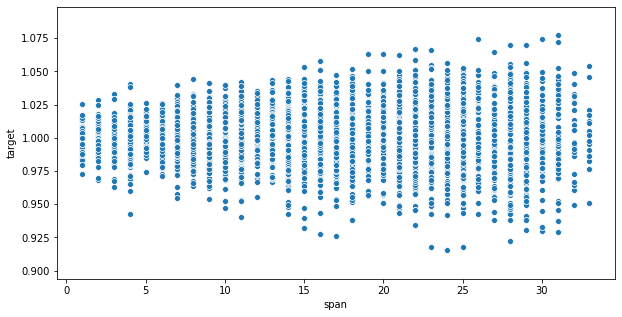

In [49]:
figure(figsize=(10,5))
sns.scatterplot(x=train["span"],y=train["target"])

In [50]:
train = train[train.target > 0.94 ]  #eliminating outliers with respect to span in target feature
train = train[train.target < 1.06]   #using limits observed from the scatterplot above

In [51]:
train.shape

(4126, 302)

In [58]:
train

,span,target,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_50_type5,feature_51_type5,feature_52_type5,feature_53_type5,feature_54_type5,feature_55_type5,feature_56_type5,feature_57_type5,feature_58_type5,feature_59_type5
id,,,,,,,,,,,,,,,,,,,,,
M00yaXQwMVJ1R1Q0RHFBVVR5BHyNyIeEd7yqxidFW7U=,17,1.025179,1.455438,0.767232,1.103207,0.355392,0.144054,1.249518,0.301203,-1.470791,...,-1.395021,-1.222626,-0.139682,0.813436,-0.340162,-0.032112,1.740059,1.000138,-1.667038,-0.128554
M01HU2pzN1dZNnVOYmhjayLgjCmIG1AyHvfRsZv+IV4=,23,0.996383,0.132304,1.724691,1.517504,0.884100,-0.897716,-0.122241,1.523423,-1.152261,...,-1.269116,0.477700,1.590249,0.166410,0.648515,0.128202,-1.853485,-0.185335,-0.933777,0.420162
M01la1Znd0ROMUU5UGJvdc5EJqBI/dj9r8C86lWkehA=,29,1.006573,0.542726,0.844240,-0.089719,0.204441,0.300044,0.564788,0.976612,0.513310,...,0.551799,1.066635,0.126409,-1.462542,1.177361,-1.142417,-0.506686,-0.741696,0.565734,-1.304175
M052cFV0RUdYT3FRMU1Kab7l27PQanylu/gYY6UjtK0=,16,0.968543,0.253863,0.799112,-1.399473,-1.979899,0.086771,-1.214792,-0.423301,1.159680,...,0.741387,-0.838532,-0.137156,0.075079,-1.395079,2.381879,-0.934174,0.775545,1.014650,1.978815
M0FFZm51b3d2a2xZOWFRWEkjj3iGrBdIeJj7omGlFz0=,4,1.006677,-0.262913,0.091079,0.799063,0.998184,-0.804963,-1.468698,-0.041668,0.533569,...,1.197475,1.162764,-0.773935,-0.962255,0.161526,-0.722540,0.490989,-1.036087,1.361248,-0.548412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
enBkU2t3TTRxYmYySTNHV4e5NAbGS6hzoufLKJdLRHk=,3,1.009017,0.762784,0.747071,0.741833,0.815161,0.081883,0.820399,1.071809,-1.866543,...,0.469823,1.630600,-0.247333,-1.214602,0.273246,0.330685,-1.491482,-0.242872,-0.516406,0.146935
enM0WTNBSGc3VFBHQzA4Nrg8FmzlzsCvSyuFPNcca+w=,27,0.986490,-1.355024,-0.170304,0.512556,0.866327,0.092968,-1.593613,0.331557,0.808736,...,1.423543,0.413655,-2.158102,0.927243,-0.385967,-0.099171,-0.021624,0.774438,1.478461,-0.157903
enMwM2tpVDVHWG90STZjROHLKGNqbPbLK3QAN4+b2Ok=,10,1.011553,-0.326522,-0.034114,-0.618931,0.189492,-0.653332,-0.034114,-0.102916,1.875139,...,-0.089725,0.257907,0.063713,0.771563,1.134778,-1.504826,0.784149,0.105668,0.668472,-1.681639


In [52]:
train_mean = train.fillna(train.mean())
test = test.fillna(test.mean())
Xt = test

In [59]:
X = train_mean.drop(['target'],axis=1)  #feature columns
y = train_mean.iloc[:,1]           #target column

In [64]:
# run once
for i in range(1,300):
    X.iloc[:,i] = X.iloc[:,i]+(X.iloc[:,0]/30)
    Xt.iloc[:,i] = Xt.iloc[:,i]+ Xt.iloc[:,0]/30


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rnd = RandomForestRegressor(n_estimators=300, max_depth=250, min_samples_leaf=20,verbose = 2)
rnd.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=250,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=2, warm_start=False)

In [92]:
yval=rnd.predict(Xt)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [95]:
pred=pd.DataFrame(columns=['target'])
pred = pred.reindex(test.index)
pred.target=yval

In [96]:
pred

,target
id,
M0E4UFFiUkU0emNkOVlHbBAR9AAPSU6QvT49pfCItDo=,1.000112
M0NLYVNZWjBjeTd1ZlBBUlngURLdbSgtBJeiqYUNosY=,1.009119
M0dDbHlMUTY5SzV0ZTBvQb9h8YABlnerdSpsViBIYVU=,0.996012
M1JHMHhkeWlZZnJ6N01objC3E5eNJCB8DbIUbwPy/qQ=,1.000155
M1dyQXB1OUZtNEpNaE5iWcovkHOs4gcR3kGXY4xfyvo=,0.999419
...,...
enBMUTZxR1I0b3dFa3VNQgWtG0vsXSAk8ohZ9IP1cfM=,0.996049
enFPQkh1MjhDbzNYTkpSaPUNwYeUYAPoFTycmmFLs78=,1.002118
enNwTlhiRVZvZ1REdjJ0M7+RvxILEKLqCPVe6hmsorY=,1.005484


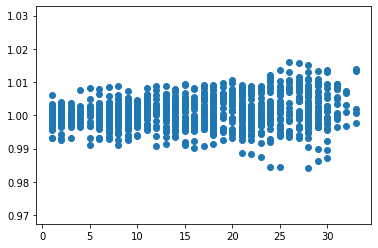

0.984165191661992

In [97]:
import matplotlib.pyplot as plt

plt.scatter(Xt['span'],pred['target'])
plt.show()
pred['target'].min()

In [98]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, M0E4UFFiUkU0emNkOVlHbBAR9AAPSU6QvT49pfCItDo= to enh2dWc5Q3lKSWF3U1hEV+/abiID/K7yVOPVBygGuVA=
Data columns (total 1 columns):
target    1000 non-null float64
dtypes: float64(1)
memory usage: 55.6+ KB


In [99]:
for i in range(1000):               #eliminating outliers in the prediction with respect to span feature
    if(pred['target'][i]<0.9705):    #using limits observed from the scatterplot
        pred['target'][i] += 0.001

In [100]:
pred.to_csv('pp11.csv')